In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("한국문화컨텐츠 선호도 조사.csv", encoding='cp949')
data=data[(data["POPULAR_DGREE_CN"]=="대중적 인기")|(data["POPULAR_DGREE_CN"]=="일반인에게 널리 인기 있고 관련 상품의 판매가 원활")]

<AxesSubplot: xlabel='콘텐츠'>

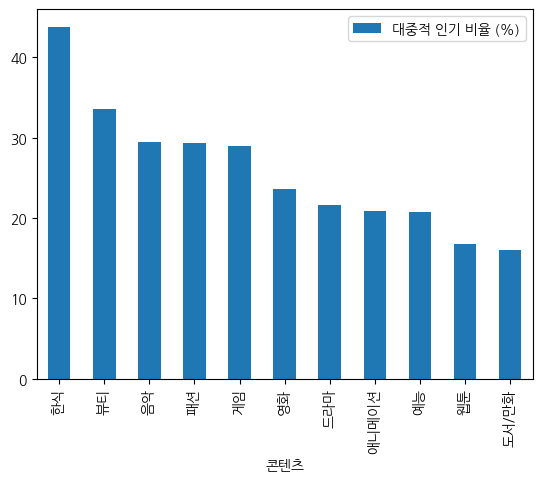

In [77]:
#1. 컨텐츠 선호도(대중적 인기) 순위

plt.rcParams["font.family"]="NanumGothic"

drama = data[data["CNTNTS_URL"]=="드라마"]
entertain = data[data["CNTNTS_URL"]=="예능"]
movie = data[data["CNTNTS_URL"]=="영화"]
music = data[data["CNTNTS_URL"]=="음악"]
anima = data[data["CNTNTS_URL"]=="애니메이션"]
book = data[data["CNTNTS_URL"]=="도서/만화"]
webtoon = data[data["CNTNTS_URL"]=="웹툰"]
game = data[data["CNTNTS_URL"]=="게임"]
fashion = data[data["CNTNTS_URL"]=="패션"]
beauty = data[data["CNTNTS_URL"]=="뷰티"]
food = data[data["CNTNTS_URL"]=="한식"]

content = ["드라마", "예능", "영화", "음악", "애니메이션", "도서/만화", "웹툰", "게임", "패션", "뷰티", "한식"]
mean = [drama["ALL_TOTAL_CO"].mean(), entertain["ALL_TOTAL_CO"].mean(), movie["ALL_TOTAL_CO"].mean(), music["ALL_TOTAL_CO"].mean(), 
        anima["ALL_TOTAL_CO"].mean(), book["ALL_TOTAL_CO"].mean(), webtoon["ALL_TOTAL_CO"].mean(), game["ALL_TOTAL_CO"].mean(), 
        fashion["ALL_TOTAL_CO"].mean(), beauty["ALL_TOTAL_CO"].mean(), food["ALL_TOTAL_CO"].mean()]

df = pd.DataFrame({'콘텐츠':content, '대중적 인기 비율 (%)':mean})
df = df.sort_values(by=['대중적 인기 비율 (%)'], ascending=False)
df.plot.bar(x='콘텐츠', y='대중적 인기 비율 (%)')

In [78]:
#2. 아시아, 비아시아 국가 집단 간의 차이 분석
#년도별로 컨텐츠 분류가 상이하여서 공통된 부분 추출
data=data[(data["CNTNTS_URL"]=="드라마")|(data["CNTNTS_URL"]=="예능")|(data["CNTNTS_URL"]=="영화")|(data["CNTNTS_URL"]=="음악")|(data["CNTNTS_URL"]=="애니메이션")|
          (data["CNTNTS_URL"]=="도서/만화")|(data["CNTNTS_URL"]=="웹툰")|(data["CNTNTS_URL"]=="게임")|(data["CNTNTS_URL"]=="패션")|(data["CNTNTS_URL"]=="뷰티")]

In [79]:
#정규성 검정

data_asia=data[(data["EXAMIN_COUNTRY_NM"]=="중국")|(data["EXAMIN_COUNTRY_NM"]=="일본")|(data["EXAMIN_COUNTRY_NM"]=="대만")|(data["EXAMIN_COUNTRY_NM"]=="태국")|
               (data["EXAMIN_COUNTRY_NM"]=="인도네시아")|(data["EXAMIN_COUNTRY_NM"]=="말레이시아")|(data["EXAMIN_COUNTRY_NM"]=="인도")|(data["EXAMIN_COUNTRY_NM"]=="베트남")|
               (data["EXAMIN_COUNTRY_NM"]=="러시아")]
data_nonasia=data[(data["EXAMIN_COUNTRY_NM"]=="호주")|(data["EXAMIN_COUNTRY_NM"]=="미국")|(data["EXAMIN_COUNTRY_NM"]=="브라질")|(data["EXAMIN_COUNTRY_NM"]=="프랑스")|
                  (data["EXAMIN_COUNTRY_NM"]=="영국")|(data["EXAMIN_COUNTRY_NM"]=="터키")|(data["EXAMIN_COUNTRY_NM"]=="UAE")|(data["EXAMIN_COUNTRY_NM"]=="남아공")|(data["EXAMIN_COUNTRY_NM"]=="")]

print(stats.shapiro(data_asia["ALL_TOTAL_CO"]))
print(stats.shapiro(data_nonasia["ALL_TOTAL_CO"]))
#아시아, 비아시아 집단 모두 p-value 값이 0.05 미만으로 정규성을 만족하지 않음
#그러나 충분한 표본수가 확보되었기 때문에 중심극한정리에 의해 정규분포를 띈다고 가정하여 모수적인 방법을 수행해본다.

ShapiroResult(statistic=0.9769067168235779, pvalue=0.0005383052048273385)
ShapiroResult(statistic=0.9822916984558105, pvalue=0.006626414135098457)


In [80]:
#등분산성 검정

print(stats.bartlett(data_asia["ALL_TOTAL_CO"], data_nonasia["ALL_TOTAL_CO"]))
#p-value 값이 0.05 미만으로 등분산성 성립하지 않음

BartlettResult(statistic=29.51259029816821, pvalue=5.555464389279851e-08)


In [81]:
#정규분포를 따르지만 이분산성을 가지는 데이터 - Welch's t test 수행

print(stats.ttest_ind(data_asia["ALL_TOTAL_CO"], data_nonasia["ALL_TOTAL_CO"], equal_var=False))
#p-value 값이 0.05보다 크므로 모집단간 평균의 차이가 동일하다는 귀무가설을 유의하게 기각할 수 있음
#결론: 아시아와 비아시아 국가 집단 간에는 유의미한 선호도 차이가 존재한다.

Ttest_indResult(statistic=5.5569929266007785, pvalue=4.801768307802391e-08)


In [82]:
#2-1 비아시아 국가 집단의 년도별 선호도 추이 분석

data_nonasia_2021=data_nonasia[data_nonasia["REPRT_YEAR_CN"]=="2021"]
data_nonasia_2020=data_nonasia[data_nonasia["REPRT_YEAR_CN"]=="2020"]
data_nonasia_2019=data_nonasia[data_nonasia["REPRT_YEAR_CN"]=="2019"]

print(stats.shapiro(data_nonasia_2019["ALL_TOTAL_CO"]))
print(stats.shapiro(data_nonasia_2020["ALL_TOTAL_CO"]))
print(stats.shapiro(data_nonasia_2021["ALL_TOTAL_CO"]))
#2021년 데이터의 p-value 값이 0.05보다 작으므로 정규성을 만족하지 않음 
#그러나 충분한 표본수가 확보되었기 때문에 중심극한정리에 의해 정규분포를 띈다고 가정하여 모수적인 방법을 수행해본다.

ShapiroResult(statistic=0.980190634727478, pvalue=0.3149929642677307)
ShapiroResult(statistic=0.972838282585144, pvalue=0.08614325523376465)
ShapiroResult(statistic=0.9572196006774902, pvalue=0.015435725450515747)


In [83]:
#등분산성 검정
print(stats.bartlett(data_nonasia_2021["ALL_TOTAL_CO"], data_nonasia_2020["ALL_TOTAL_CO"], data_nonasia_2019["ALL_TOTAL_CO"]))
#p-value 값이 0.05보다 작으므로 등분산성을 만족하지 않는다는 것을 알 수 있다

BartlettResult(statistic=13.071192250100957, pvalue=0.0014508638736087478)


In [84]:
#Welch Anova 분석

import pingouin as pg
pg.welch_anova(dv="ALL_TOTAL_CO", between="REPRT_YEAR_CN", data=data_nonasia)
#p-value값이 0.05보다 작으므로 귀무가설을 기각함 -> 년도별로 국가간의 선호도 차이가 존재한다.
#국가 집단 간 선호도 평균 차이가 어디서 발생하는지 알아보기 위해 사후검정 실시

,Source,ddof1,ddof2,F,p-unc,np2
0,REPRT_YEAR_CN,2,144.466234,106.666552,3.542521e-29,0.428959


In [85]:
#Games Howell 검정
pg.pairwise_gameshowell(dv="ALL_TOTAL_CO", between="REPRT_YEAR_CN", data=data_nonasia)
#p-value 값이 모두 0.05보다 작으므로 
#2019, 2020, 2021년 모두 통계적으로 유의미한 선호도 차이가 존재한다.

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,2019,2020,25.444444,25.887500,-0.443056,1.325233,-0.334323,149.659651,9.402750e-01,-0.054038
1,2019,2021,25.444444,11.833333,13.611111,1.115913,12.197288,132.487046,9.214851e-15,2.022125
2,2020,2021,25.887500,11.833333,14.054167,1.192711,11.783376,137.134127,1.265654e-14,1.904582


<AxesSubplot: xlabel='연령대'>

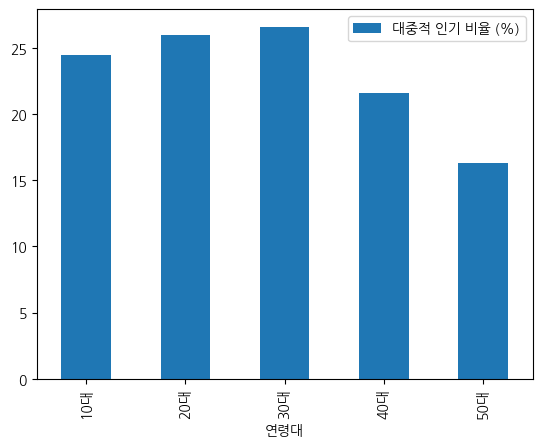

In [86]:
#3. 연령대별 선호도 차이
age = ["10대", "20대", "30대", "40대", "50대"]
mean = [data["ALL_N10S_RATE"].mean(), data["ALL_N20S_RATE"].mean(), data["ALL_N30S_RATE"].mean(), data["ALL_N40S_RATE"].mean(), data["ALL_N50S_RATE"].mean()]
df = pd.DataFrame({'연령대':age, '대중적 인기 비율 (%)':mean})
df.plot.bar(x='연령대', y='대중적 인기 비율 (%)')
#대략적인 선호도 차이 시각화를 위한 막대그래프

In [87]:
#이중 10~30대 간의 차이는 3% 미만으로 비슷해 보이는데, 과연 이것이 유의미한 차이일까?
#anova 분석을 통해 연령별 선호도 간의 유의미한 차이가 존재하는지 확인해볼까?

#정규성 검정
print(stats.shapiro(data["ALL_N10S_RATE"]))
print(stats.shapiro(data["ALL_N20S_RATE"]))
print(stats.shapiro(data["ALL_N30S_RATE"]))
print(stats.shapiro(data["ALL_N40S_RATE"]))
print(stats.shapiro(data["ALL_N50S_RATE"]))
#5개 집단 모두 p-value 값이 0.05 미만으로 정규성을 만족하지 않음
#그러나 충분한 표본수가 확보되었기 때문에 중심극한정리에 의해 정규분포를 띈다고 가정하여 모수적인 방법을 수행해본다.

ShapiroResult(statistic=0.9703075885772705, pvalue=3.086159949816647e-08)
ShapiroResult(statistic=0.9752442836761475, pvalue=3.2188111731557e-07)
ShapiroResult(statistic=0.9723432064056396, pvalue=7.882636765543793e-08)
ShapiroResult(statistic=0.9670550227165222, pvalue=7.43505523814747e-09)
ShapiroResult(statistic=0.9138188362121582, pvalue=7.966553450789956e-16)


In [88]:
#등분산성 검정

print(stats.bartlett(data["ALL_N10S_RATE"], data["ALL_N20S_RATE"], data["ALL_N30S_RATE"], data["ALL_N40S_RATE"], data["ALL_N50S_RATE"]))
#p-value 값이 0.05보다 크므로 등분산성 성립

BartlettResult(statistic=3.320396236185835, pvalue=0.5057071573792216)


In [89]:
#ANOVA 분석

print(stats.f_oneway(data["ALL_N10S_RATE"], data["ALL_N20S_RATE"], data["ALL_N30S_RATE"], data["ALL_N40S_RATE"], data["ALL_N50S_RATE"]))
print(stats.f_oneway(data["ALL_N10S_RATE"], data["ALL_N20S_RATE"], data["ALL_N30S_RATE"]))
print(stats.f_oneway(data["ALL_N30S_RATE"], data["ALL_N40S_RATE"], data["ALL_N50S_RATE"]))
#10~50대 집단 모두 anova 분석을 실행한 결과 p-value 값이 0.05보다 매우 작으므로 유의미한 차이를 지닌 집단이 존재한다.
#-> 사후분석을 통해 어느 집단이 유의미한 차이를 지니는지 확인해보기

F_onewayResult(statistic=45.79761039380172, pvalue=4.1203786395954744e-37)
F_onewayResult(statistic=2.9293927016488954, pvalue=0.05375131415855613)
F_onewayResult(statistic=69.56374521716948, pvalue=1.4934291904752267e-29)


In [90]:
#Tukey's test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
v = list(data.loc[:,"ALL_N10S_RATE"]) + list(data.loc[:,"ALL_N20S_RATE"]) + list(data.loc[:,"ALL_N30S_RATE"])+ list(data.loc[:,"ALL_N40S_RATE"])+ list(data.loc[:,"ALL_N50S_RATE"])
labels = ['10대']*len(data["ALL_N10S_RATE"]) + ['20대']*len(data["ALL_N20S_RATE"]) + ['30대']*len(data["ALL_N30S_RATE"]) + ['40대']*len(data["ALL_N40S_RATE"]) + ['50대']*len(data["ALL_N50S_RATE"])
tukey = pairwise_tukeyhsd(v, labels, alpha=0.05)
print(tukey)
#10-40, 10-50, 20-40, 20-50, 30-40, 30-50, 40-50 연령대 간의 reject가 True로 귀무가설을 기각한다.
#즉 10~30대, 40대, 50대 집단 간에 통계적으로 유의미한 평균 선호도 차이가 존재한다.
#10, 20, 30대 간에 통계적으로 유의미한 차이는 존재하지 않는다.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   10대    20대    1.495 0.4352  -0.9081   3.898  False
   10대    30대   2.1116 0.1159  -0.2915  4.5146  False
   10대    40대   -2.887 0.0093  -5.2901 -0.4839   True
   10대    50대  -8.1926    0.0 -10.5957 -5.7896   True
   20대    30대   0.6166 0.9564  -1.7865  3.0197  False
   20대    40대  -4.3819    0.0   -6.785 -1.9789   True
   20대    50대  -9.6876    0.0 -12.0907 -7.2845   True
   30대    40대  -4.9985    0.0  -7.4016 -2.5954   True
   30대    50대 -10.3042    0.0 -12.7073 -7.9011   True
   40대    50대  -5.3057    0.0  -7.7088 -2.9026   True
-----------------------------------------------------
